In [3]:
import pandas as pd
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [4]:
from prophet import Prophet

In [6]:
df = pd.read_csv('C:/Users/hamandawanat/OneDrive - Grand Reinsurance/Udemy Maven Power BI/Predictive Analytics Udemy/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/BeerWineLiquor.csv')

In [7]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [16]:
#Formating our data: Phrophet can only read the columns as ds and y
df.columns = ['ds','y']

In [10]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [15]:
#Make sure ds column is a standard datetime object
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [17]:
#By default, prophet expects daily data,however it can handle monthly data whose frequency you can specify later on 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [21]:
#Creating and fitting the model
m = Prophet()
m.fit(df)

09:49:05 - cmdstanpy - INFO - Chain [1] start processing
09:49:07 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
# create a placeholder to hold our future predictions
future = m.make_future_dataframe(periods=24,freq='MS')

In [23]:
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [24]:
len(df)

324

In [25]:
len(future)

348

In [26]:
#We now want to predict and fill in the future
forecast = m.predict(future)

In [27]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1772.898400,1157.534381,1460.879194,1772.898400,1772.898400,-461.854666,-461.854666,-461.854666,-461.854666,-461.854666,-461.854666,0.0,0.0,0.0,1311.043734
1,1992-02-01,1775.730691,1184.499838,1506.477720,1775.730691,1775.730691,-427.558972,-427.558972,-427.558972,-427.558972,-427.558972,-427.558972,0.0,0.0,0.0,1348.171720
2,1992-03-01,1778.380254,1453.775871,1758.040356,1778.380254,1778.380254,-179.202384,-179.202384,-179.202384,-179.202384,-179.202384,-179.202384,0.0,0.0,0.0,1599.177870
3,1992-04-01,1781.212546,1424.904161,1761.037393,1781.212546,1781.212546,-196.248666,-196.248666,-196.248666,-196.248666,-196.248666,-196.248666,0.0,0.0,0.0,1584.963880
4,1992-05-01,1783.953473,1664.824533,1988.923646,1783.953473,1783.953473,45.147907,45.147907,45.147907,45.147907,45.147907,45.147907,0.0,0.0,0.0,1829.101380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2020-08-01,5200.713315,5077.907081,5402.358712,5188.664602,5213.908839,40.246355,40.246355,40.246355,40.246355,40.246355,40.246355,0.0,0.0,0.0,5240.959670
344,2020-09-01,5216.783409,4920.906903,5240.503953,5203.690704,5230.900407,-132.916603,-132.916603,-132.916603,-132.916603,-132.916603,-132.916603,0.0,0.0,0.0,5083.866806
345,2020-10-01,5232.335113,5020.472955,5357.075302,5217.910911,5247.282329,-43.289567,-43.289567,-43.289567,-43.289567,-43.289567,-43.289567,0.0,0.0,0.0,5189.045546
346,2020-11-01,5248.405207,5168.933217,5504.798097,5232.815929,5264.626454,86.826365,86.826365,86.826365,86.826365,86.826365,86.826365,0.0,0.0,0.0,5335.231572


In [28]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [29]:
forecast[['ds','yhat_lower', 'yhat_upper','yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
336,2020-01-01,4463.754412,4779.841619,4628.441552
337,2020-02-01,4500.118043,4843.226863,4678.807340
338,2020-03-01,4770.779527,5111.812233,4942.197241
339,2020-04-01,4780.439263,5094.636620,4941.221054
340,2020-05-01,5036.129515,5353.137254,5198.169330
341,2020-06-01,5030.954371,5335.381480,5179.161700
342,2020-07-01,5140.259381,5459.498967,5311.678492
343,2020-08-01,5077.907081,5402.358712,5240.959670
344,2020-09-01,4920.906903,5240.503953,5083.866806
345,2020-10-01,5020.472955,5357.075302,5189.045546


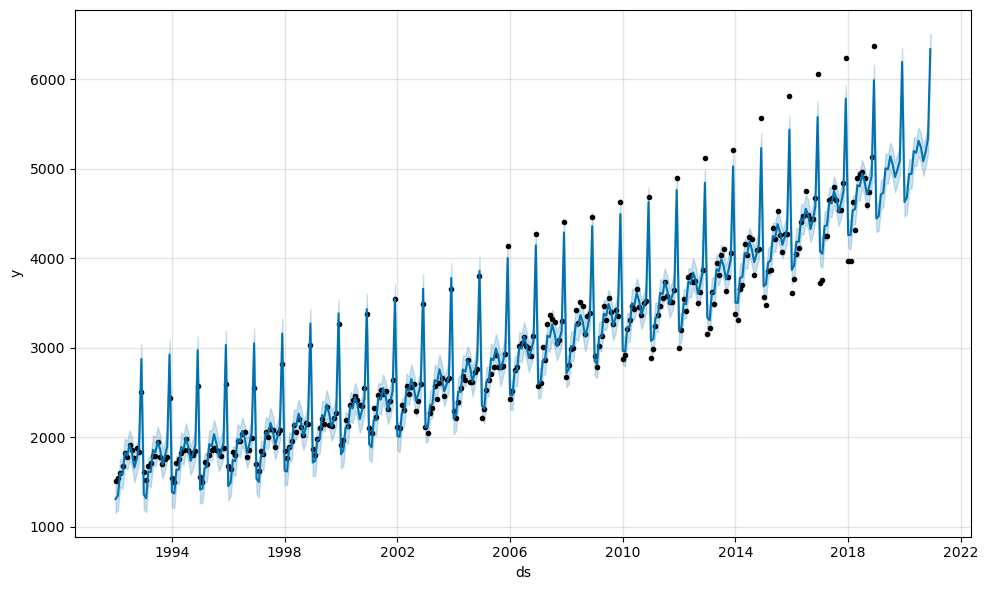

In [31]:
#We are using prophet's own inbuilt forecasting tools
m.plot(forecast);

(16071.0, 18628.0)

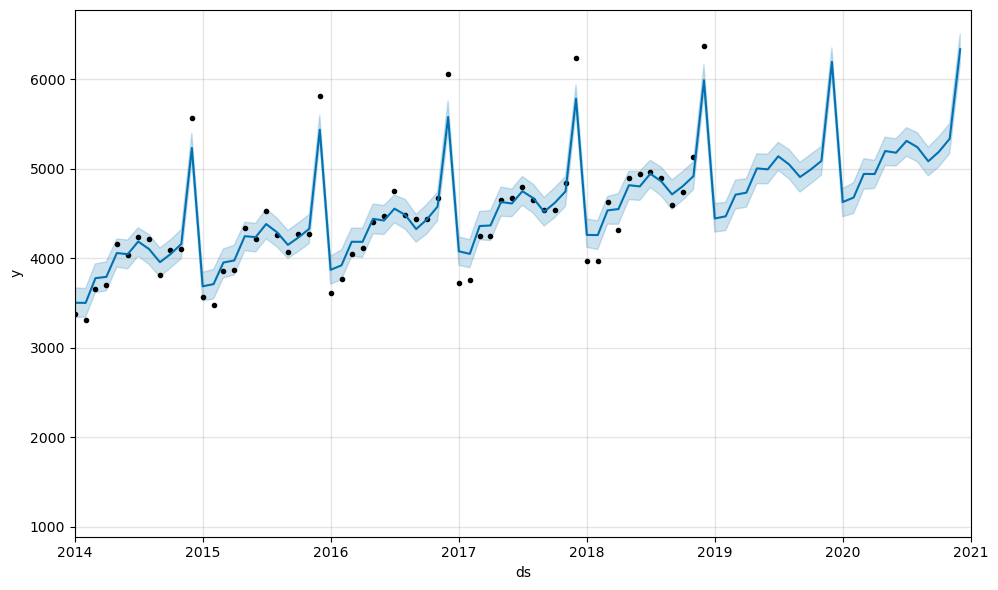

In [33]:
import matplotlib.pyplot as plt
m.plot(forecast);
plt.xlim('2014-01-01','2021-01-01')

In [34]:
#During the peaks, profit is a lot more sure of itself because the upper and lower bounds tend to to be smaller during the peak cycles

<AxesSubplot:xlabel='ds'>

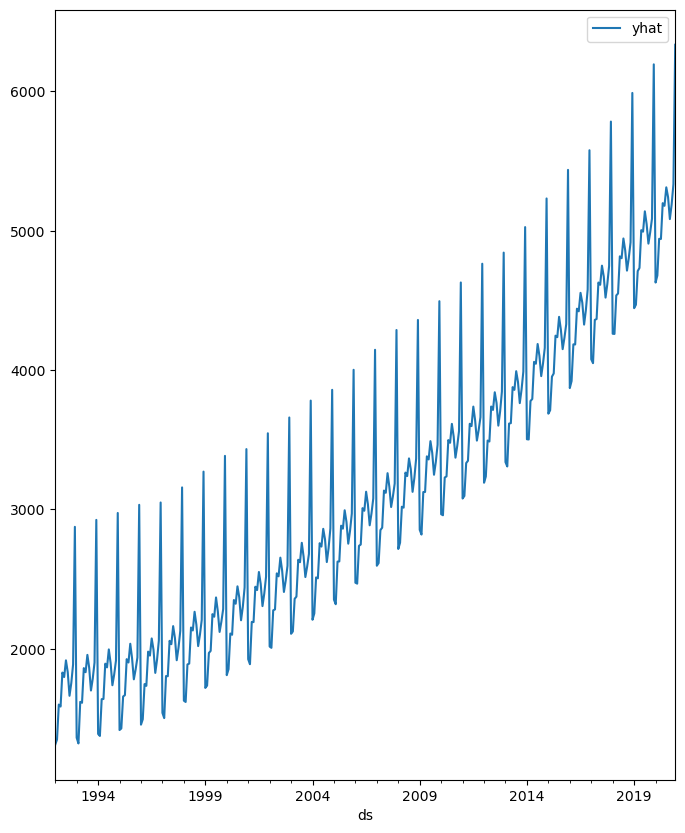

In [38]:
forecast.plot(x='ds', y='yhat',figsize=(8,10))

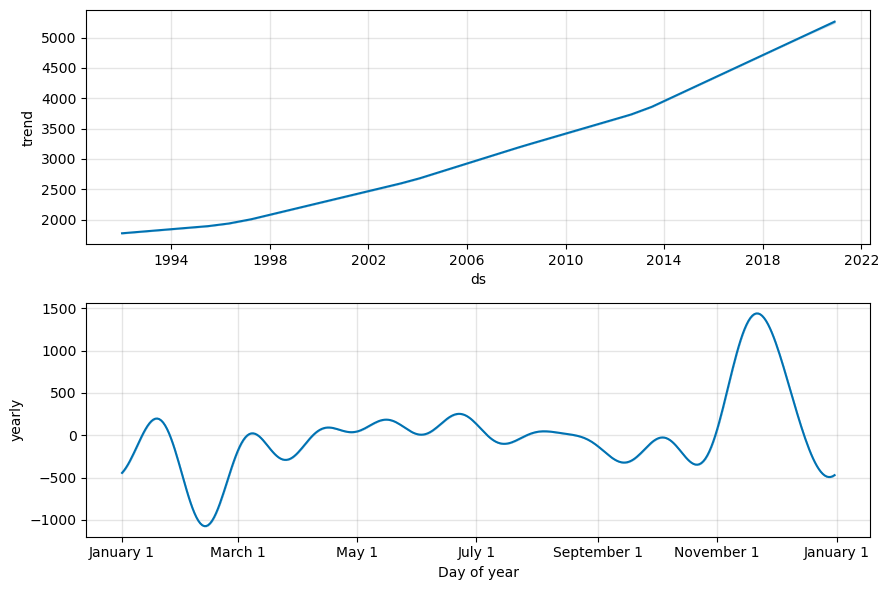

In [36]:
m.plot_components(forecast);

In [37]:
#there tends to be a huge peak during the holidays for beer and liquor supplies